In [40]:
import wave
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import librosa.display

obj = wave.open('test2.wav','r')
print("Number of channels",obj.getnchannels())
print("Sample width",obj.getsampwidth())
print("Frame rate.",obj.getframerate())
print("Number of frames",obj.getnframes())
print("parameters:",obj.getparams())
obj.close() 

Number of channels 1
Sample width 2
Frame rate. 44100
Number of frames 220160
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=220160, comptype='NONE', compname='not compressed')


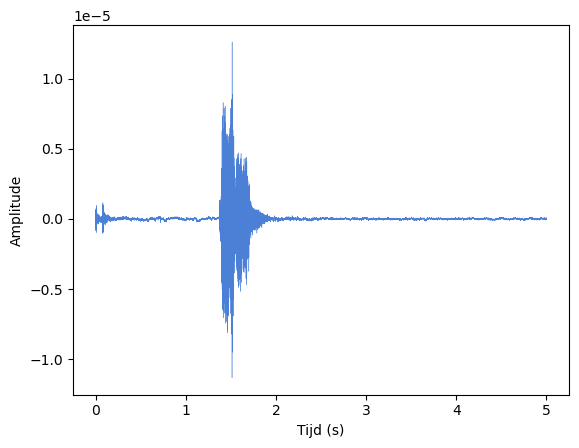

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('nagalm_test_3.wav', 'r')
amount_of_samples = len(data)

scaled_data = data / (2.**15)

time_array = (np.arange(0, amount_of_samples, 1)) / sample_rate
                      
plt.plot(time_array, scaled_data, linewidth=0.3, alpha=0.7, color='#004bc6')
plt.xlabel ('Tijd (s)')
plt.ylabel ('Amplitude')
plt.show()

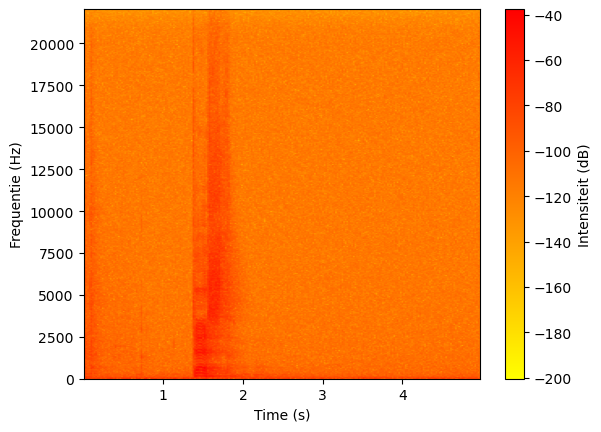

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('nagalm_test_3.wav', 'r')
spectrum, freqs, t, im = plt.specgram(data, Fs=sample_rate, NFFT=1024, cmap = plt.get_cmap('autumn_r'))
cbar = plt.colorbar(im)

plt.xlabel('Time (s)')
plt.ylabel('Frequentie (Hz)')
cbar.set_label('Intensiteit (dB)')
plt.show()

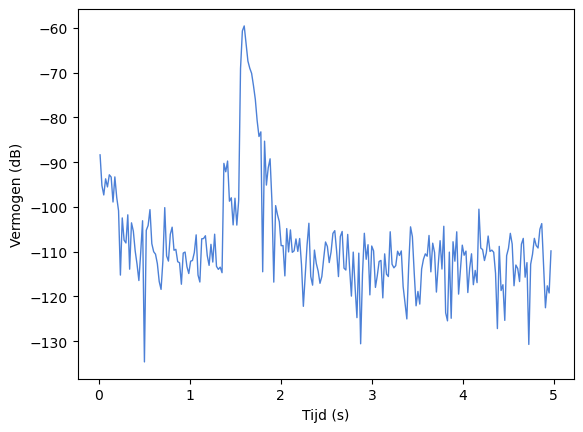

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('nagalm_test_3.wav', 'r')

# Kiezen van de frenquentie die je wilt checken
# print(freqs)
index_of_frequency = np.where(freqs == 4005.17578125)[0][0]
                                      
# Vind een geluid data voor de bijbehorende frequentie
data_for_frequency = spectrum[index_of_frequency]
                                      
# Waardes veranderen naar decibel
data_in_db = 10 * np.log10(data_for_frequency)
    
plt.plot(t, data_in_db, linewidth=1, alpha=0.7, color='#004bc6')
plt.xlabel ('Tijd (s)')
plt.ylabel ('Vermogen (dB)')
plt.show()                                    

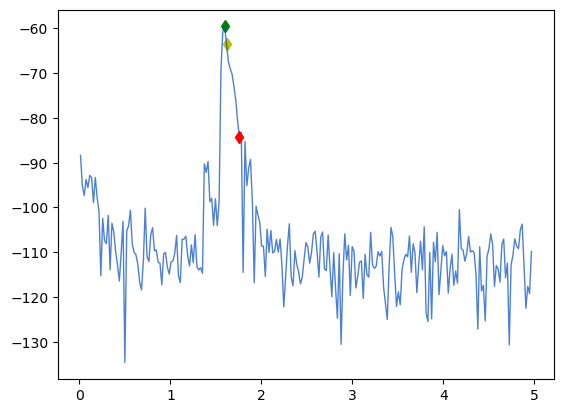

0.43


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('nagalm_test_3.wav', 'r')

#Vinden index van een maximale waarde
index_of_max = np.argmax(data_in_db)
value_of_max = data_in_db[index_of_max]
plt.plot(t[index_of_max], data_in_db[index_of_max], 'gd')

#  Slice our array from a max value
sliced_array = data_in_db[index_of_max:]
value_of_max_less_5 = value_of_max - 5

# Vinden van dichtsbijzijnde waarde, grote kans dat je niet exact een waarde van value_of_max_less_5 gaat vinden
def find_nearest_value(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
value_of_max_less_5 = find_nearest_value(sliced_array, value_of_max_less_5)
index_of_max_less_5 = np.where(data_in_db == value_of_max_less_5)
plt.plot(t[index_of_max_less_5], data_in_db[index_of_max_less_5], 'yd')
plt.plot(t, data_in_db, linewidth=1, alpha=0.7, color='#004bc6')

# Slice our array from a max-5db
value_of_max_less_25 = value_of_max - 25
value_of_max_less_25 = find_nearest_value(sliced_array, value_of_max_less_25)
index_of_max_less_25 = np.where(data_in_db == value_of_max_less_25)
plt.plot(t[index_of_max_less_25], data_in_db[index_of_max_less_25], 'rd')
plt.show()

rt20 = (t[index_of_max_less_5] - t[index_of_max_less_25])[0]
rt60 = 3 * rt20
print(round(abs(rt60), 2))

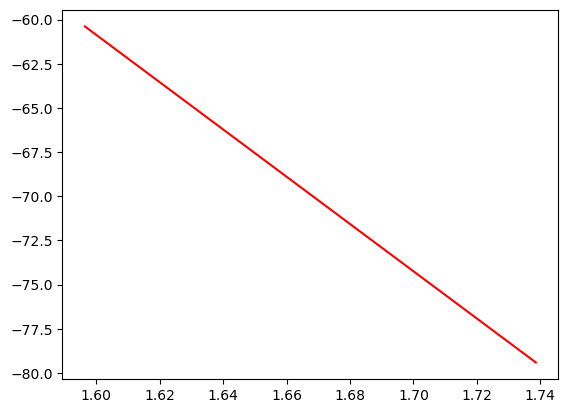

In [59]:
# Linear regression
from scipy import stats

# Find a value which is 35 dB less than our max
value_of_max_less_35 = value_of_max - 35
value_of_max_less_35 = find_nearest_value(sliced_array, value_of_max_less_25)
index_of_max_less_35 = np.where(data_in_db == value_of_max_less_35) [0][0]

# Slice arrays to from max to max-35 dB to calculate a linear regression for it
x = t[index_of_max:index_of_max_less_35]
y = data_in_db[index_of_max:index_of_max_less_35]

# You dont have to worry if the gap between min value in y array and max value is a bit more than 35 dB
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x, intercept + slope*x, 'r', label='Linear regression')
lingress = intercept + slope*x

In [60]:
linregress_data = intercept + slope * x
index_of_max = 0
value_of_max_less_20 = linregress_data[0] - 20
value_of_max_less_20 = find_nearest_value(linregress_data, value_of_max_less_20)
index_of_max_less_20 = np.where(linregress_data == value_of_max_less_20)[0][0]
rt20 = (x[index_of_max] - x[index_of_max_less_20])
rt60 = 3 * rt20
print(round(abs(rt60), 2))

0.43
